In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import torch

In [101]:
class Gaussian:
    def __init__(self, mean, std_dev):
        self.mean = mean
        self.std_dev = std_dev

    def pdf(self, x):
        """
        Compute the probability density function (PDF) of the Gaussian distribution at point x.

        Parameters:
            x (float or numpy array): Point(s) at which to compute the PDF.

        Returns:
            float or numpy array: PDF value(s) at the specified point(s).
        """
        return 1 / (np.sqrt(2 * np.pi) * self.std_dev) * np.exp(-0.5 * ((x - self.mean) / self.std_dev)**2)

In [2]:
torch.cuda.is_available()

True

In [170]:
Gaus = Gaussian(21,1)

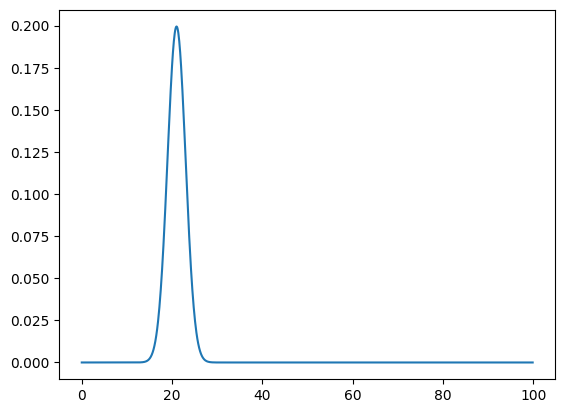

In [104]:
plt.plot(x,y)

14


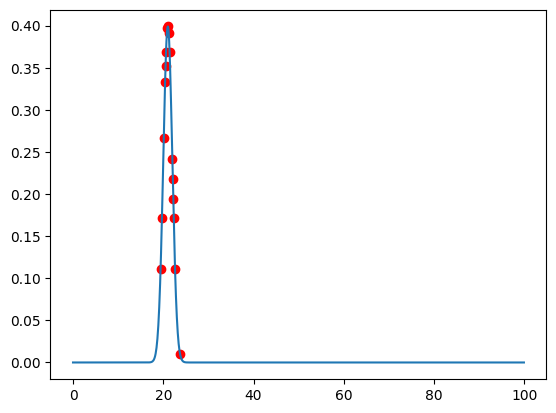

In [197]:
x = np.arange(100,step=0.1)
y = Gaus.pdf(x)

idx = 0

plt.plot(x,y)
neig = []
np.random.shuffle(x)
max = Gaus.pdf(21)
for point in x:
    ye = np.random.binomial(1,p=Gaus.pdf(point)/max)
    if ye:
        neig.append(point)
        if 19.4<point<22.6:
            idx = idx+1
    if len(neig)==16:
        break

neig = np.array(neig)

values = Gaus.pdf(neig)
plt.scatter(neig,values,color='red')

print(idx)



In [195]:
from mpl_toolkits.mplot3d import Axes3D

# Define parameters of the Gaussian distribution
mean = [0, 0]  # mean vector
covariance = [[1, 0.5], [0.5, 1]]  # covariance matrix

# Generate grid points for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Create grid points as a 2D array
grid = np.stack((x, y), axis=2)

# Compute PDF values for each point on the grid
pdf_values = np.zeros_like(x)
for i in range(len(x)):
    for j in range(len(y)):
        point = grid[i, j]
        pdf_values[i, j] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covariance))) * np.exp(-0.5 * np.dot(np.dot((point - mean), np.linalg.inv(covariance)), (point - mean).T))


neigh = []
max = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covariance))) * np.exp(-0.5 * np.dot(np.dot((point - mean), np.linalg.inv(covariance)), (point - mean).T))

for i in range 100


# Plot 3D surface of the Gaussian distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, pdf_values, cmap='viridis')
ax.scatter
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
ax.set_title('2D Gaussian Distribution')

plt.show()

SyntaxError: invalid syntax (1070405967.py, line 26)

In [6]:
import torchsummary
import torch_geometric.nn as tgnn

mlp = tgnn.models.MLP(
            in_channels=5,
            out_channels=5,
            hidden_channels=5,
            num_layers=2,
            plain_last=True).to('cuda')

torchsummary.summary(mlp, (5,5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 5, 5]              30
       BatchNorm1d-2                 [-1, 5, 5]              10
         BatchNorm-3                 [-1, 5, 5]               0
              ReLU-4                 [-1, 5, 5]               0
            Linear-5                 [-1, 5, 5]              30
Total params: 70
Trainable params: 70
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [180]:
from torch_geometric.datasets import ShapeNet
import open3d as o3d
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
data = torch.load('/home/lars/Graph_Learning/data/ShapeNet_Part/processed/part_00008.pt')

In [30]:
cloud = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(data[0].pos))

In [45]:
cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.2, max_nn=30))

In [47]:
o3d.visualization.draw_geometries([cloud],point_show_normal=True)

In [163]:
cloud_l = np.loadtxt('/home/lars/Graph_Learning/data/shapenet_core/raw/03636649/c561496324b6d8154c5b22ae639d5204.txt')

In [173]:
points = cloud_l[:,:3]
color = cloud_l[:,6]

In [174]:
color

array([25., 25., 27., 27., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 25., 24., 27., 27., 24., 24., 27., 27., 27., 27.,
       27., 27., 25., 27., 27., 24., 27., 27., 27., 27., 27., 24., 25.,
       27., 25., 25., 25., 25., 27., 27., 27., 27., 27., 25., 24., 25.,
       25., 25., 27., 24., 25., 27., 27., 25., 27., 27., 27., 25., 25.,
       25., 25., 25., 27., 27., 27., 25., 27., 27., 27., 24., 27., 25.,
       24., 24., 24., 24., 24., 24., 25., 25., 27., 25., 27., 24., 27.,
       25., 27., 27., 27., 27., 27., 27., 27., 27., 25., 25., 27., 25.,
       24., 27., 25., 25., 27., 25., 27., 27., 27., 27., 27., 27., 27.,
       24., 24., 25., 27., 25., 24., 27., 27., 25., 25., 24., 25., 27.,
       24., 25., 25., 25., 27., 27., 27., 27., 27., 27., 27., 24., 25.,
       27., 27., 27., 25., 27., 27., 27., 27., 25., 27., 27., 25., 25.,
       27., 25., 27., 27., 27., 25., 27., 27., 25., 27., 24., 24., 24.,
       24., 24., 24., 27., 25., 25., 25., 25., 25., 24., 24., 24

In [178]:
cloudp = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))
cloudp.normals = o3d.utility.Vector3dVector(cloud_l[:,3:6])
#cloudp.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.2, max_nn=30))

In [181]:
# Generate a colormap with at least 50 distinct colors
colormap = plt.get_cmap('tab20')  # Use 'tab20' or create a custom colormap

# If 'tab20' doesn't have enough distinct colors, generate a custom colormap
def generate_custom_colormap(num_colors):
    colors = cm.get_cmap('tab20', num_colors)  # Choose a colormap and number of colors
    return colors

colormap = generate_custom_colormap(50)

# Map indices to colors
colors = colormap(color / 50)[:, :3]

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [175]:
o3d.visualization.draw_geometries([cloudp], point_show_normal=True, color = color)

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: list[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: list[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[numpy.float64[3, 1]], up: numpy.ndarray[numpy.float64[3, 1]], front: numpy.ndarray[numpy.float64[3, 1]], zoom: float) -> None

Invoked with: [PointCloud with 873 points.]; kwargs: point_show_normal=True, color=array([25., 25., 27., 27., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 25., 24., 27., 27., 24., 24., 27., 27., 27., 27.,
       27., 27., 25., 27., 27., 24., 27., 27., 27., 27., 27., 24., 25.,
       27., 25., 25., 25., 25., 27., 27., 27., 27., 27., 25., 24., 25.,
       25., 25., 27., 24., 25., 27., 27., 25., 27., 27., 27., 25., 25.,
       25., 25., 25., 27., 27., 27., 25., 27., 27., 27., 24., 27., 25.,
       24., 24., 24., 24., 24., 24., 25., 25., 27., 25., 27., 24., 27.,
       25., 27., 27., 27., 27., 27., 27., 27., 27., 25., 25., 27., 25.,
       24., 27., 25., 25., 27., 25., 27., 27., 27., 27., 27., 27., 27.,
       24., 24., 25., 27., 25., 24., 27., 27., 25., 25., 24., 25., 27.,
       24., 25., 25., 25., 27., 27., 27., 27., 27., 27., 27., 24., 25.,
       27., 27., 27., 25., 27., 27., 27., 27., 25., 27., 27., 25., 25.,
       27., 25., 27., 27., 27., 25., 27., 27., 25., 27., 24., 24., 24.,
       24., 24., 24., 27., 25., 25., 25., 25., 25., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 25., 25., 25., 24., 27., 25.,
       24., 24., 24., 25., 27., 25., 27., 27., 25., 27., 27., 27., 25.,
       25., 24., 24., 24., 24., 24., 24., 24., 24., 27., 24., 25., 25.,
       25., 25., 24., 24., 24., 24., 25., 27., 27., 27., 25., 24., 27.,
       24., 25., 27., 25., 25., 25., 25., 25., 27., 24., 24., 24., 24.,
       25., 25., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 25., 27., 24., 25., 25., 25.,
       27., 25., 25., 24., 25., 24., 25., 27., 25., 24., 24., 24., 24.,
       24., 24., 24., 25., 25., 25., 24., 25., 25., 24., 27., 27., 27.,
       27., 24., 24., 27., 27., 27., 25., 25., 27., 25., 24., 24., 25.,
       27., 27., 24., 24., 24., 24., 24., 24., 24., 24., 24., 27., 27.,
       24., 24., 24., 24., 24., 24., 24., 27., 25., 27., 25., 25., 27.,
       27., 27., 24., 25., 27., 27., 27., 25., 25., 25., 27., 27., 27.,
       24., 24., 25., 24., 24., 27., 25., 27., 24., 27., 25., 25., 24.,
       25., 27., 27., 27., 27., 27., 25., 27., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 27., 27., 27., 27., 24., 27., 27., 25., 25.,
       24., 24., 24., 25., 24., 27., 24., 27., 25., 27., 27., 27., 27.,
       25., 25., 27., 24., 24., 27., 27., 25., 27., 27., 25., 25., 25.,
       25., 25., 25., 24., 27., 27., 27., 25., 27., 27., 27., 24., 27.,
       25., 27., 27., 27., 25., 24., 24., 25., 25., 25., 27., 27., 25.,
       24., 24., 24., 24., 27., 25., 24., 24., 27., 27., 27., 25., 27.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 27., 27.,
       27., 27., 27., 27., 27., 25., 27., 25., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 25., 25., 27., 24., 27., 27., 27., 27.,
       27., 27., 27., 25., 27., 27., 25., 27., 27., 27., 25., 24., 27.,
       25., 25., 25., 25., 27., 25., 24., 27., 27., 27., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 25., 27., 27., 27., 25., 25., 25.,
       27., 27., 27., 24., 25., 24., 25., 27., 27., 24., 27., 24., 25.,
       24., 25., 24., 24., 24., 24., 24., 25., 27., 27., 25., 27., 27.,
       25., 27., 25., 27., 27., 27., 24., 27., 27., 27., 27., 27., 25.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 25., 24., 24.,
       24., 24., 24., 24., 24., 25., 25., 25., 27., 25., 27., 24., 24.,
       25., 27., 27., 24., 27., 27., 27., 27., 27., 25., 24., 25., 25.,
       27., 27., 25., 27., 27., 27., 27., 27., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 25., 27., 24.,
       24., 24., 24., 27., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       27., 24., 24., 24., 24., 24., 24., 27., 24., 24., 27., 27., 24.,
       24., 24., 24., 25., 27., 24., 25., 24., 24., 24., 24., 24., 24.,
       25., 25., 27., 27., 24., 24., 27., 24., 24., 24., 24., 24., 24.,
       24., 25., 27., 27., 27., 25., 25., 27., 25., 25., 25., 25., 27.,
       25., 25., 24., 24., 24., 24., 24., 27., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 27., 27., 25., 25., 27., 24., 24., 24., 24.,
       24., 24., 24., 27., 24., 24., 25., 25., 24., 25., 27., 27., 24.,
       24., 24., 24., 24., 24., 24., 24., 25., 24., 24., 27., 25., 25.,
       25., 25., 25., 27., 25., 25., 24., 24., 25., 24., 24., 24., 24.,
       24., 24., 24., 27., 27., 27., 27., 24., 24., 24., 24., 24., 27.,
       25., 27., 24., 24., 24., 24., 24., 25., 27., 25., 24., 24., 24.,
       24., 25., 27., 24., 24., 24., 24., 27., 24., 24., 27., 27., 27.,
       25., 25., 27., 25., 27., 24., 24., 24., 24., 27., 27., 25., 24.,
       24., 24., 27., 24., 25., 25., 25., 24., 24., 25., 24., 24., 25.,
       24., 27., 24., 25., 24., 24., 27., 24., 24., 24., 27., 25., 25.,
       25., 25., 24., 24., 24., 24., 25., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 25., 25., 25., 24., 24., 24., 27.,
       25., 27.])

In [75]:
import json
import os

In [115]:
file = json.load(open('/home/lars/Graph_Learning/data/shapenet_core/train_test_split/shuffled_val_file_list.json'))

In [116]:
arr = np.array(file)

In [117]:
def modify_paths(paths):
    new_paths = []
    for path in paths:
        # Split the path into parts
        parts = path.split(os.sep)
        # Remove the first folder
        new_path = os.sep.join(parts[1:])
        # Append .txt extension
        new_path = new_path + '.pt'
        new_paths.append(new_path)
    return np.array(new_paths)

In [118]:
arr = modify_paths(arr)

In [119]:
arr[:30]

array(['02691156/be02fd401a12d23822362be7f5226e91.pt',
       '03001627/c983108db7fcfa3619fb4103277a6b93.pt',
       '04379243/6ef4f1f0b3f8aad48cbb8bac2032149c.pt',
       '02958343/a495bebb2ebd72f3dd7cb6e3ad90d3ea.pt',
       '02691156/1b7ac690067010e26b7bd17e458d0dcb.pt',
       '02691156/35c9e363ca3fa6f8e4fc4c6009ee9462.pt',
       '03636649/d54d7977d760f4c3bd16d4490a10a752.pt',
       '02691156/7e1d4583f70c8583431589819e5ca60c.pt',
       '03001627/39fb5d3f557f64d4389f9a01d027a78.pt',
       '04379243/366645cdaab60c793e5eb583c9d92b57.pt',
       '04379243/57e4a4a4806c38e33702d3e624608075.pt',
       '04379243/5317439efc03a22de27790b0ec8671f7.pt',
       '04379243/1e202e618d6375052945e400e1430726.pt',
       '04379243/f65decafeb2b8518dcfcef693e7ec696.pt',
       '02691156/7b553eabcfe3709f3d2b6eee5a74cb08.pt',
       '03001627/2060f4d31feb73dd7762ba3a489df006.pt',
       '04379243/525148edf1f9aa72bc7f58784fda27b5.pt',
       '03001627/f12a3ffbe0f8b5076253bf0968762241.pt',
       '026

In [120]:
np.savetxt('/home/lars/Graph_Learning/data/shapenet_core/train_test_split/shuffled_val_file_list.txt', arr, fmt='%s')

In [121]:
import h5py

In [122]:
data = h5py.File('/home/lars/Graph_Learning/data/ShapeNet_Part/hdf5_data/ply_data_train5.h5', 'r')

In [128]:
with h5py.File('/home/lars/Graph_Learning/data/ShapeNet_Part/hdf5_data/ply_data_train5.h5') as f:
                data = f['data'][:]
                labels = f['label'][:]
                pid = f['pid'][:]

In [132]:
labels

array([[ 0],
       [15],
       [ 8],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=uint8)